In [22]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [23]:
files = [file for file in os.listdir('asymmetry_paramgrid_0_1/') if 'results' in file and len(file.split('_')) == 3]
files_test = [file for file in files if '_0_' in file]

In [24]:
with open('asymmetry_paramgrid_0_1/'+'paramgrid_asymmetry.txt','rb') as f:
    param_grid = pickle.load(f)

In [25]:
def mutator_single_mut(genotypes_names, pop_vec):
    p = 0
    for g in range(len(genotypes_names)):
        if (genotypes_names[g][0] == 1 and genotypes_names[g][2] == 0) and genotypes_names[g][1] == 1:
            p += pop_vec[g]
    return(p)

def baseline_single_mut(genotypes_names, pop_vec):
    p = 0
    for g in range(len(genotypes_names)):
        if (genotypes_names[g][0] == 1 and genotypes_names[g][2] == 0) and genotypes_names[g][1] == 0:
            p += pop_vec[g]
    return(p)

def baseline_nomut(genotypes_names, pop_vec):
    p = 0
    for g in range(len(genotypes_names)):
        if (genotypes_names[g][0] == 0 or genotypes_names[g][2] == 0) and genotypes_names[g][1] == 0:
            p += pop_vec[g]
    return(p)

def mutator_nomut(genotypes_names, pop_vec):
    p = 0
    for g in range(len(genotypes_names)):
        if (genotypes_names[g][0] == 0 or genotypes_names[g][2] == 0) and genotypes_names[g][1] == 1:
            p += pop_vec[g]
    return(p)

def pS_proportion(genotypes_names, pop_vec):
    return(mutator_single_mut(genotypes_names, pop_vec) + baseline_single_mut(genotypes_names, pop_vec))

def pM_proportion(genotypes_names, pop_vec):
    return(mutator_single_mut(genotypes_names, pop_vec) + mutator_nomut(genotypes_names, pop_vec))

def pR_proportion(genotypes_names, pop_vec):
    return(baseline_single_mut(genotypes_names, pop_vec)/baseline_nomut(genotypes_names, pop_vec))

def association(genotypes_names, pop_vec):
    return(mutator_single_mut(genotypes_names, pop_vec)/pS_proportion(genotypes_names, pop_vec))

In [26]:
def convert_logspace(val, true_axis, range_axis):
    possibilities = np.logspace(np.log10(true_axis[0]),np.log10(true_axis[-1]), 10000)
    closest_possibility = np.searchsorted(possibilities, val)
    converted_value = ((closest_possibility - 0) / (10000-0))*len(range_axis)
    return(converted_value)

In [27]:
genotype_names_3 = []
for i in range(3):
    for j in range(2):
        for k in range(5):
            genotype_names_3.append((i,j,k))

In [28]:
noise_labels = ['$10^{-6}$','$10^{-5}$','$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$','0.95']
switching_rates = np.logspace(-6, np.log10(0.95),100)
range_axis = np.arange(99)
which_ticks = [convert_logspace(val, switching_rates, range_axis) for val in [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.95]]

In [29]:
noise_levels = np.logspace(-6, np.log10(0.95), 100)

In [30]:
noise_levels[::20]

array([1.00000000e-06, 1.61295009e-05, 2.60160801e-04, 4.19626388e-03,
       6.76836423e-02])

In [31]:
ind_pos = {(0.01,10):(0,0), (0.01,100):(1,0),
           (0.03,10):(0,1), (0.03,100):(1,1),
           (0.1,10):(0,2), (0.1,100):(1,2)}

In [32]:
all_results = {}

for p in range(12):

    heatmap_m0 = np.zeros((100,100))
    heatmap_m1 = np.zeros((100,100))
    heatmap_M0 = np.zeros((100,100))
    heatmap_M1 = np.zeros((100,100))
    
    heatmap_pM = np.zeros((100,100))
    heatmap_pS = np.zeros((100,100))
    
    heatmap_association = np.zeros((100,100))
    heatmap_adaptation = np.zeros((100,100))

    for i in range(100):
        
        with open('asymmetry_paramgrid_0_1/results_'+str(p)+'_'+str(i)+'.txt', 'rb') as f:
            file_result = pickle.load(f)
            for j in range(100):
                
                result_m0 = baseline_nomut(genotype_names_3, file_result[j])
                result_m1 = baseline_single_mut(genotype_names_3, file_result[j])
                result_M0 = mutator_nomut(genotype_names_3, file_result[j])
                result_M1 = mutator_single_mut(genotype_names_3, file_result[j])
                
                result_pM = pM_proportion(genotype_names_3, file_result[j])
                result_pS = pS_proportion(genotype_names_3, file_result[j])
                
                result_association = result_M1 - result_pM*result_pS
                result_adaptation = param_grid[p]['mu']*np.exp(-param_grid[p]['mu'])*result_m1 + param_grid[p]['tau']*param_grid[p]['mu']*np.exp(-param_grid[p]['tau']*param_grid[p]['mu'])*result_M1
                
                heatmap_m0[99-i,j] = result_m0
                heatmap_m1[99-i,j] = result_m1
                heatmap_M0[99-i,j] = result_M0                
                heatmap_M1[99-i,j] = result_M1
                
                heatmap_pM[99-i,j] = result_pM
                heatmap_pS[99-i,j] = result_pS
                
                heatmap_association[99-i,j] = result_association
                heatmap_adaptation[99-i,j] = result_adaptation
                

    all_results[(param_grid[p]['mu'], param_grid[p]['s'], param_grid[p]['tau'])] = {'m1':heatmap_m1, 
                                                                                    'm0': heatmap_m0, 
                                                                                    'M0': heatmap_M0, 
                                                                                    'M1': heatmap_M1, 
                                                                                    'pS': heatmap_pS, 
                                                                                    'pM': heatmap_pM, 
                                                                                    'adaptation': heatmap_adaptation, 
                                                                                    'association': heatmap_association}

In [33]:
with open('asymmetry_0_1_msb_results.txt', 'wb') as f:
    pickle.dump(all_results, f)

In [34]:
params = list(all_results.keys())

In [35]:
for p in range(12):
    print(p, params[p])

0 (4e-05, 0.01, 10)
1 (4e-05, 0.01, 100)
2 (4e-05, 0.03, 10)
3 (4e-05, 0.03, 100)
4 (4e-05, 0.1, 10)
5 (4e-05, 0.1, 100)
6 (0.0001, 0.01, 10)
7 (0.0001, 0.01, 100)
8 (0.0001, 0.03, 10)
9 (0.0001, 0.03, 100)
10 (0.0001, 0.1, 10)
11 (0.0001, 0.1, 100)


In [70]:
exponent_notation = {8:'x$10^{-5}$', 9: 'x$10^{-5}$', 10: 'x$10^{-6}$', 2: 'x$10^{-6}$'}

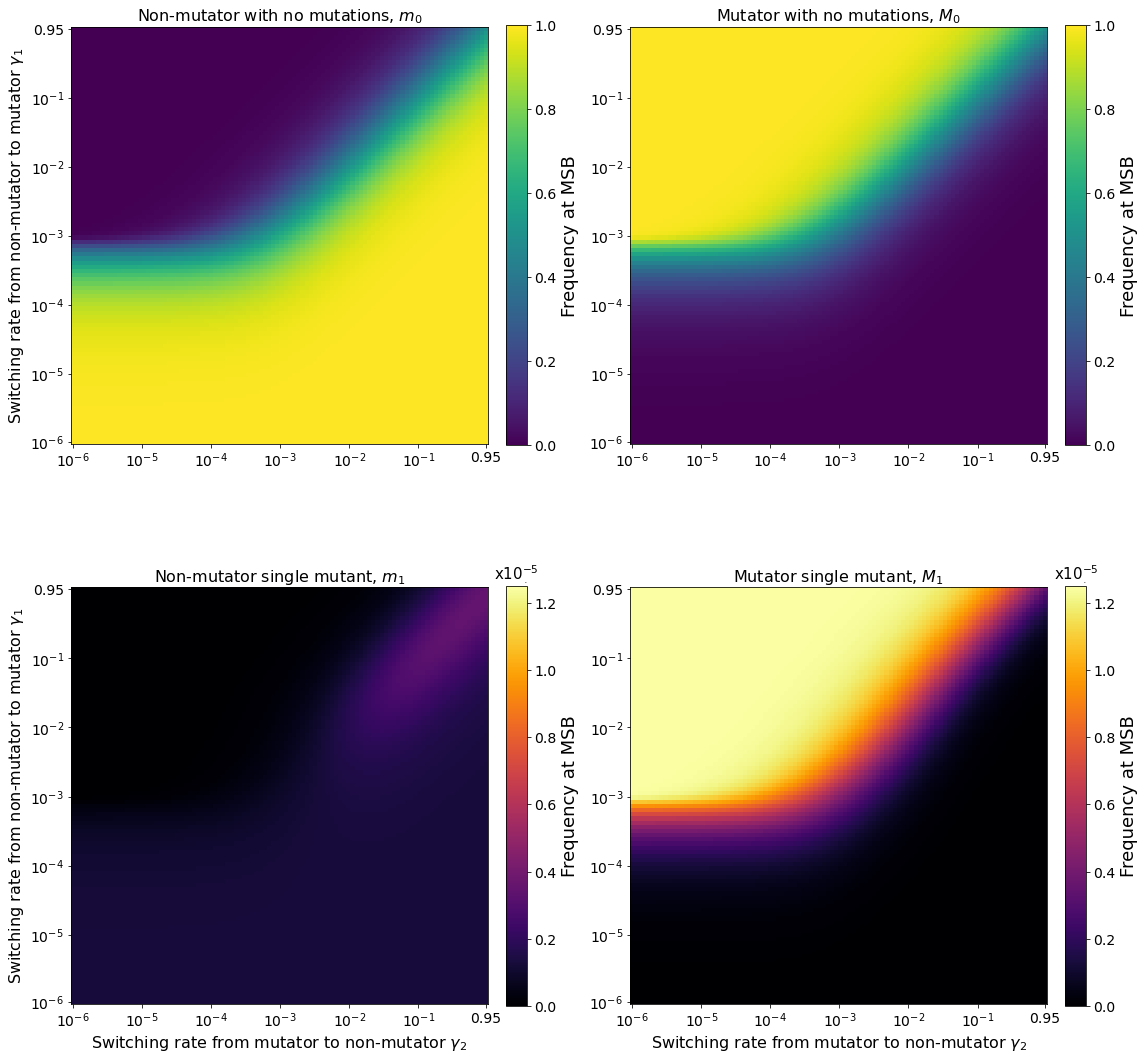

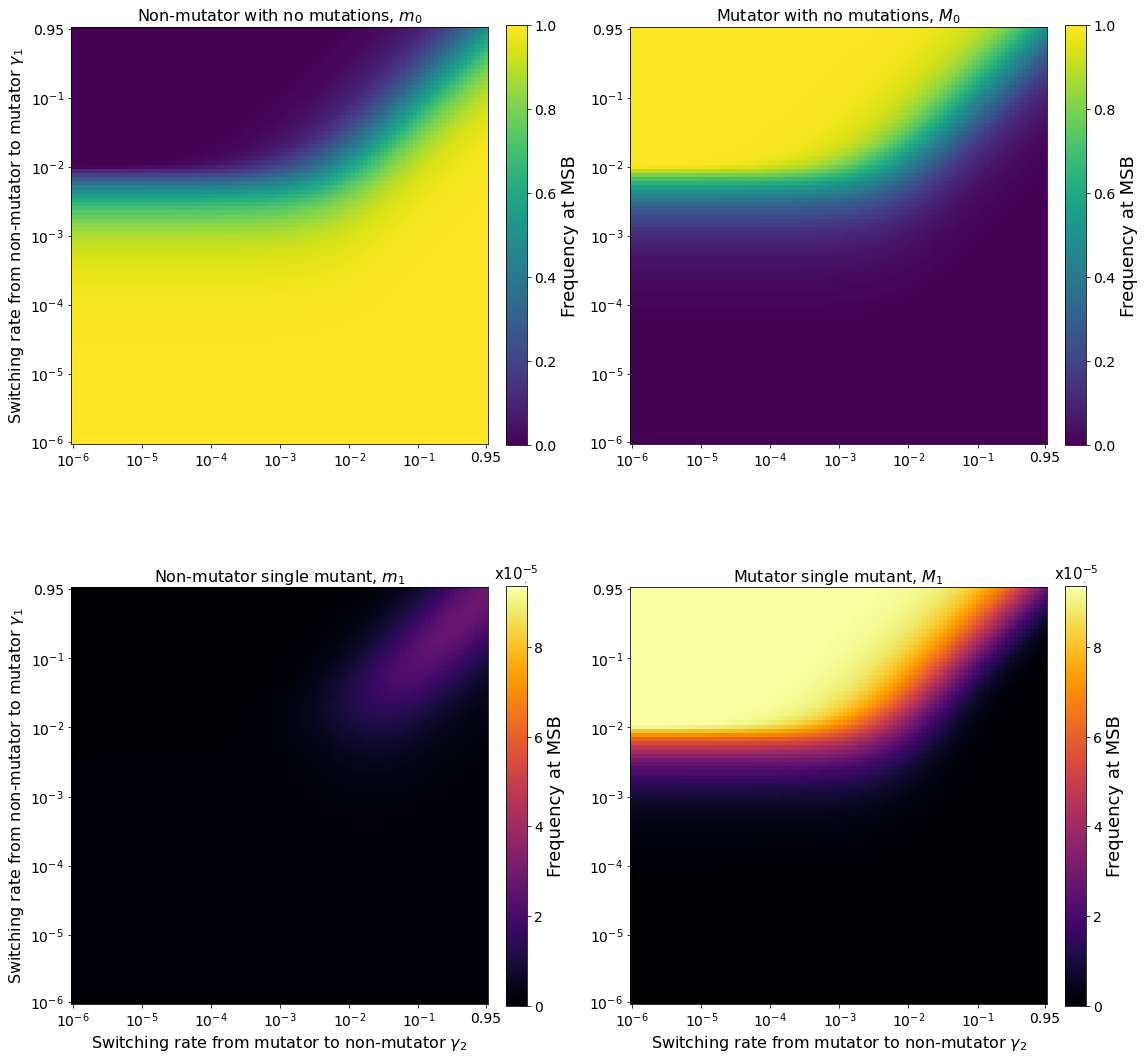

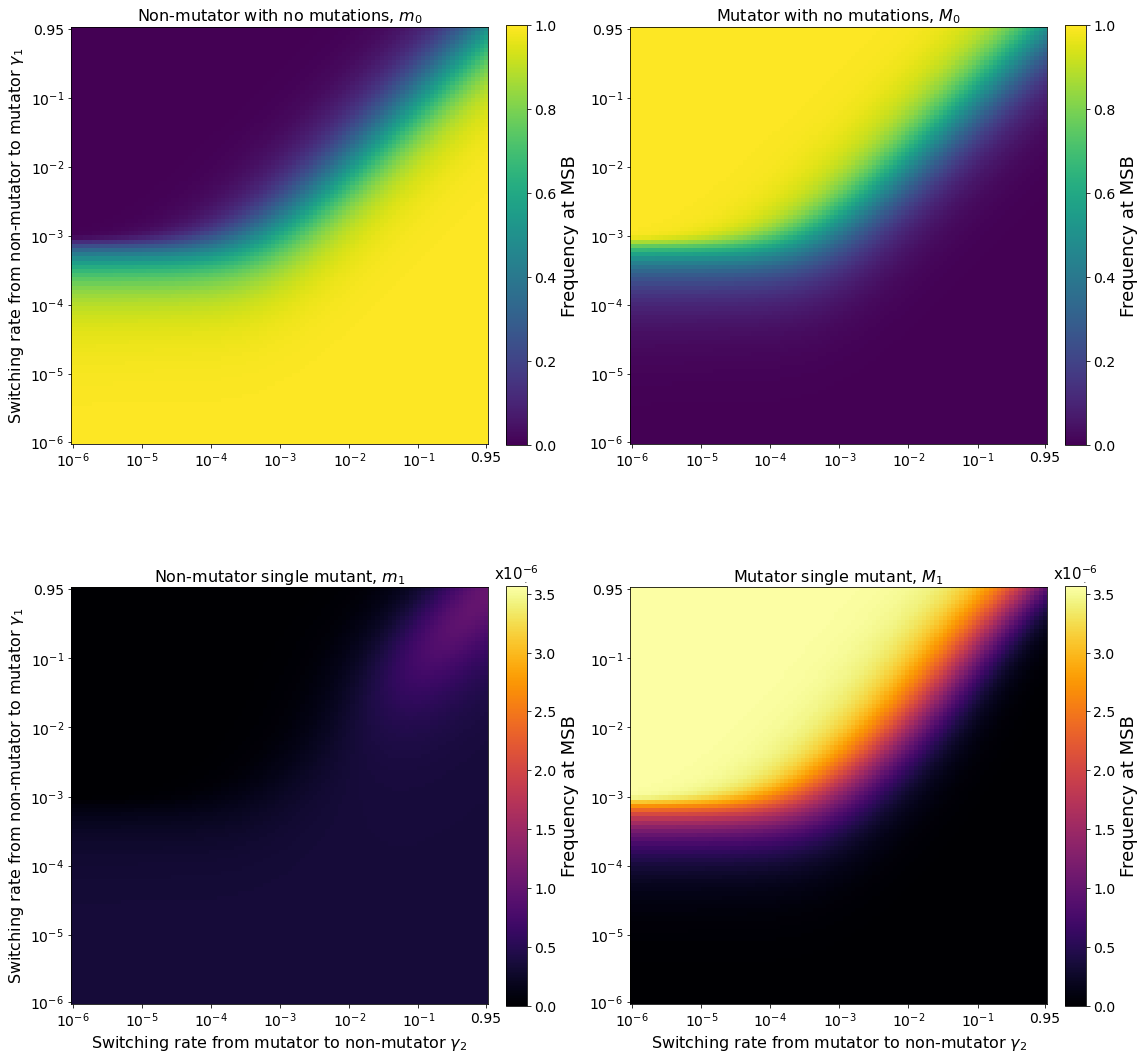

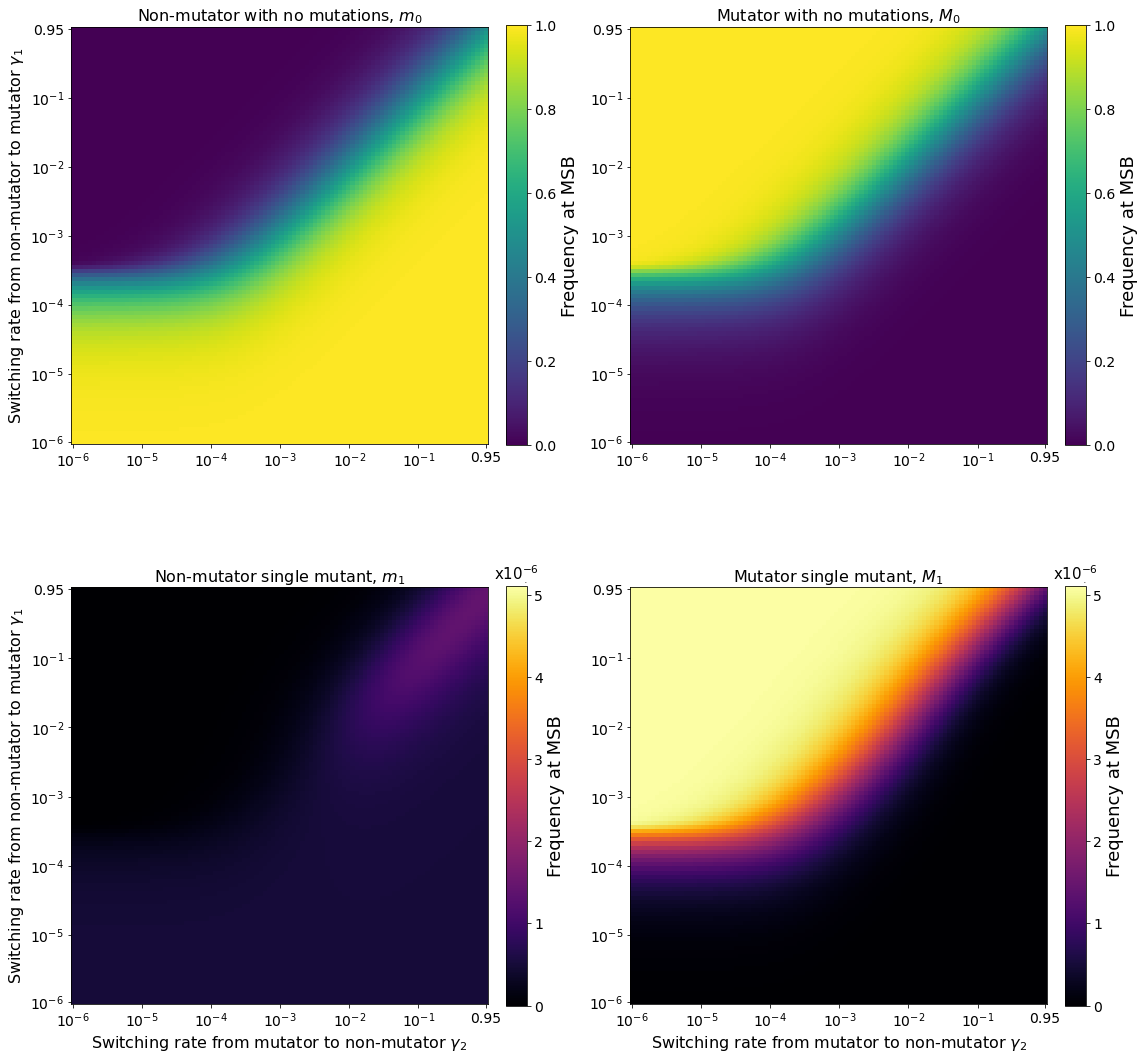

In [76]:
for paramind in [8,9,10,2]:

    fig, ax = plt.subplots(2,2,figsize = (16,16))

    param = params[paramind]

    im0 = ax[0,0].imshow(all_results[param]['m0'], vmin = 0, vmax = 1)
    im1 = ax[1,0].imshow(all_results[param]['m1'], cmap = 'inferno', vmin = 0, vmax = np.max(all_results[param]['M1']))
    iM0 = ax[0,1].imshow(all_results[param]['M0'], vmin = 0, vmax = 1)
    iM1 = ax[1,1].imshow(all_results[param]['M1'], cmap = 'inferno', vmin = 0, vmax = np.max(all_results[param]['M1']))
    
    cbar0 = plt.colorbar(im0, ax=ax[0,0], fraction=0.046, pad=0.04)
    cbar1 = plt.colorbar(im1, ax=ax[1,0], fraction=0.046, pad=0.04)
    cbar2 = plt.colorbar(iM0, ax=ax[0,1], fraction=0.046, pad=0.04)
    cbar3 = plt.colorbar(iM1, ax=ax[1,1], fraction=0.046, pad=0.04)

    ax[0,0].set_title('Non-mutator with no mutations, $m_0$', fontsize = 16)
    ax[1,0].set_title('Non-mutator single mutant, $m_1$', fontsize = 16)
    ax[0,1].set_title('Mutator with no mutations, $M_0$', fontsize = 16)
    ax[1,1].set_title('Mutator single mutant, $M_1$', fontsize = 16)
    
    for i in range(2):
        ax[i,0].set_ylabel('Switching rate from non-mutator to mutator $\gamma_1$', fontsize = 16)
        ax[1,i].set_xlabel('Switching rate from mutator to non-mutator $\gamma_2$', fontsize = 16)
        for j in range(2):
            ax[i,j].set_xticks(which_ticks)
            ax[i,j].set_xticklabels(noise_labels, fontsize = 14)
            ax[i,j].set_yticks(which_ticks)
            ax[i,j].set_yticklabels(noise_labels[::-1], fontsize = 14)
            
    for cbar in [cbar0, cbar1, cbar2, cbar3]:
        cbar.ax.tick_params(labelsize=14)
        cbar.set_label('Frequency at MSB', fontsize = 18)
        cbar.formatter.set_powerlimits((0, 0))
        
    for cbar in [cbar1, cbar3]:
        cbar.ax.yaxis.offsetText.set(size=0)
        cbar.ax.set_title(exponent_notation[paramind], fontsize = 15)

    plt.tight_layout()
    output_folder = 'figures/frequencies_four_cats_0_1/'
    plt.savefig(output_folder+'frequencies_fourcats_'+str(paramind)+'_JAN20.jpg', dpi = 400)
    plt.show()

In [87]:
set_paramsets_s = [(0,1,6,7),
                   (2,3,8,9),
                   (4,5,10,11)]

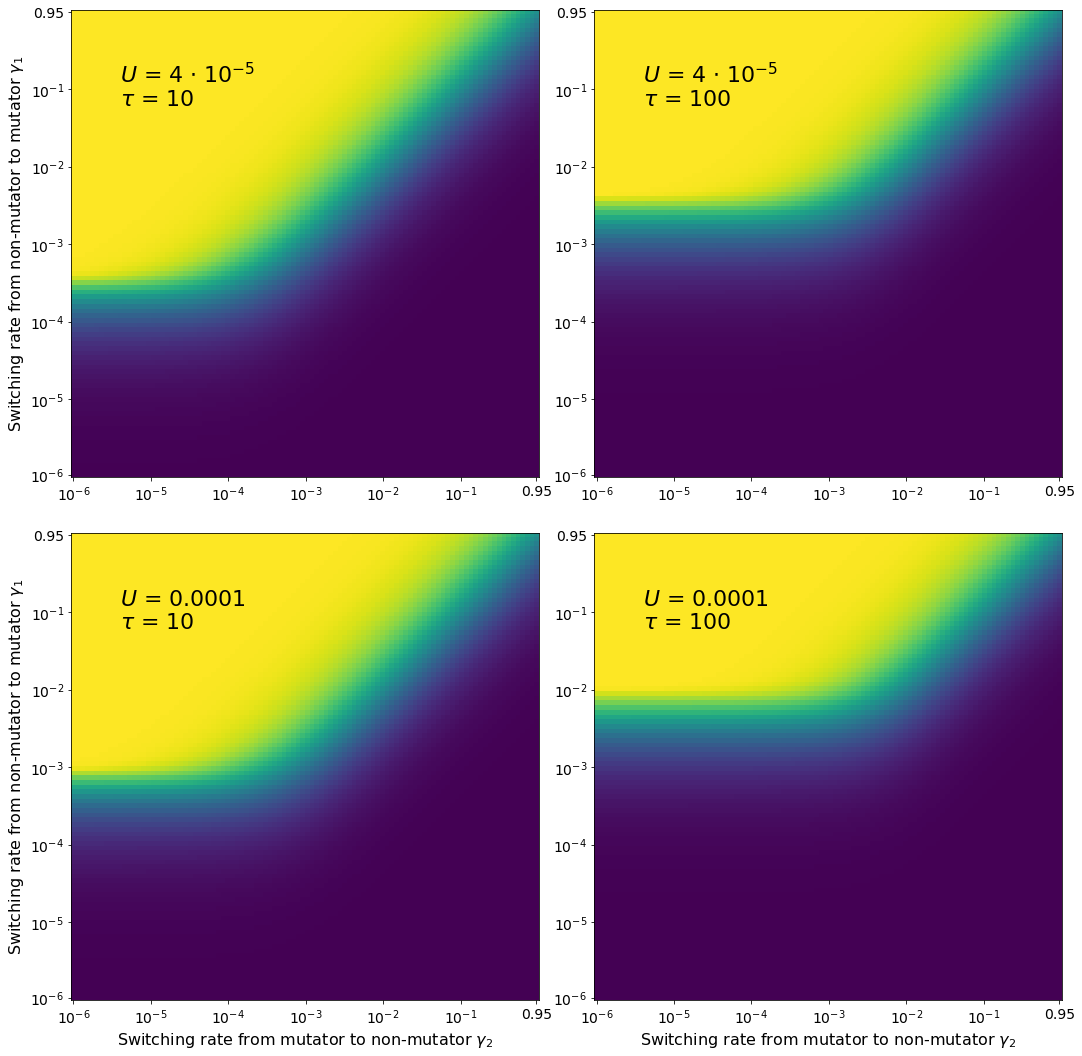

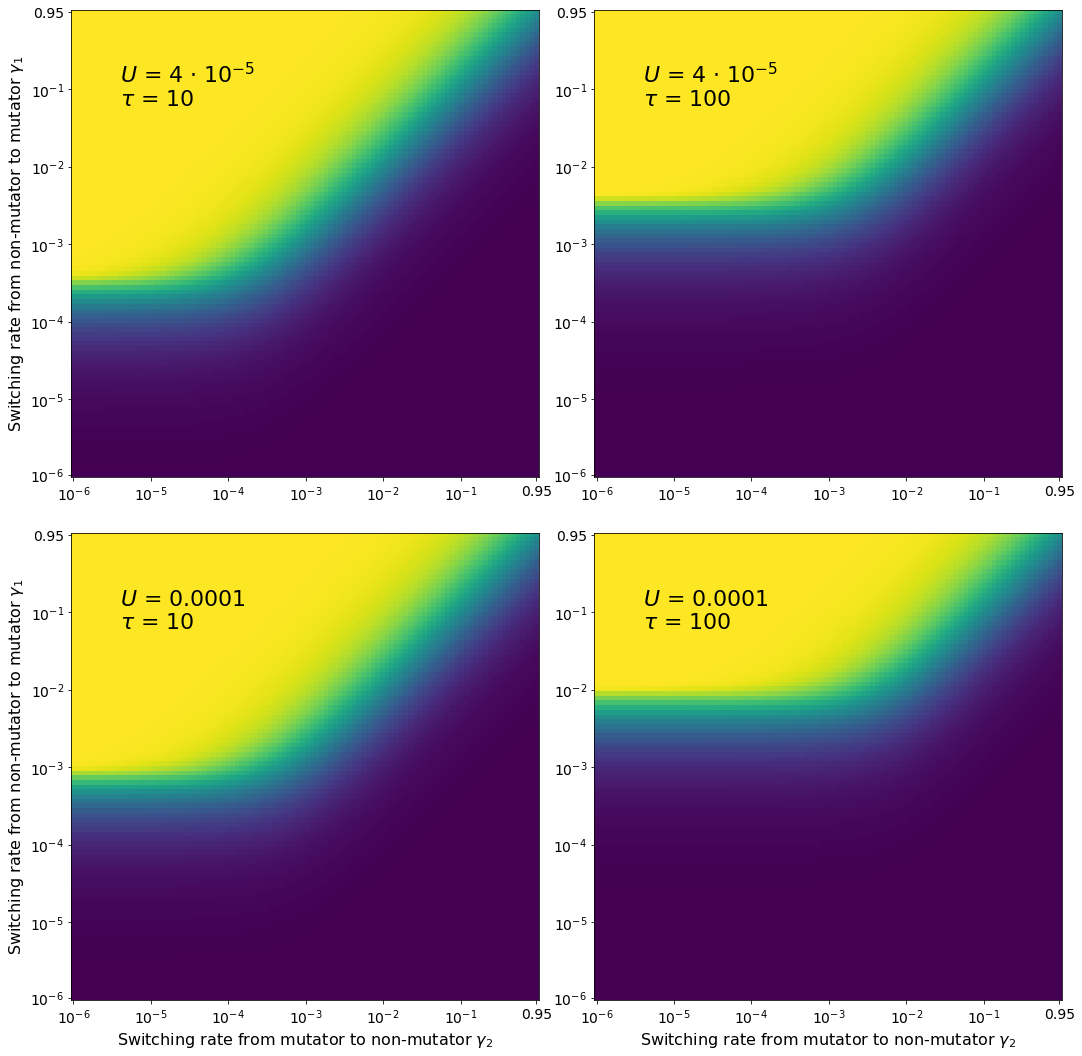

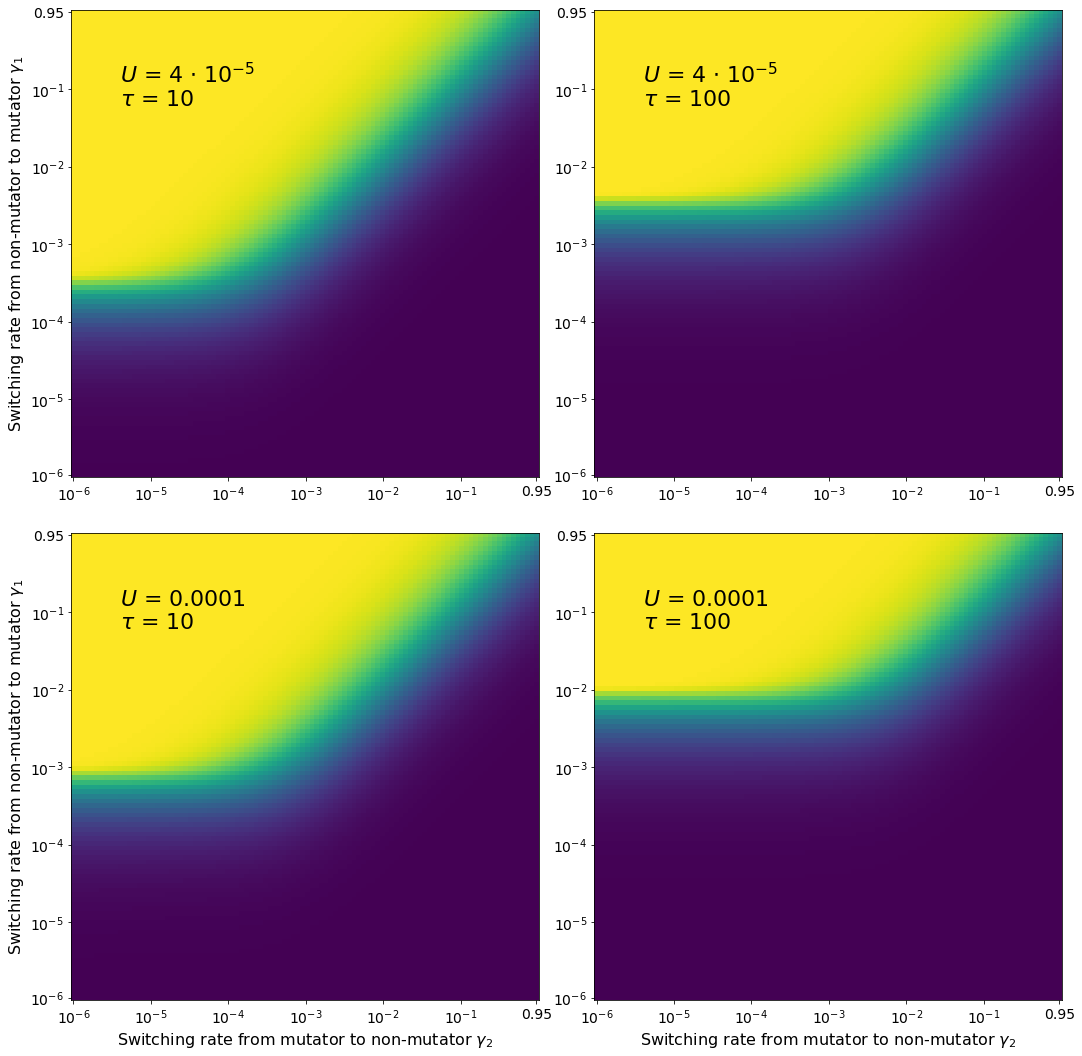

In [88]:
for paramset in range(3):

    fig, ax = plt.subplots(2,2, figsize = (15,15))

    im0 = ax[0,0].imshow(all_results[params[set_paramsets_s[paramset][0]]]['pM'], vmin = 0, vmax = 1)
    im1 = ax[0,1].imshow(all_results[params[set_paramsets_s[paramset][1]]]['pM'], vmin = 0, vmax = 1)
    im2 = ax[1,0].imshow(all_results[params[set_paramsets_s[paramset][2]]]['pM'], vmin = 0, vmax = 1)
    im3 = ax[1,1].imshow(all_results[params[set_paramsets_s[paramset][3]]]['pM'], vmin = 0, vmax = 1)

    ax[0,0].text(10,20, '$U$ = 4 $\cdot$ $10^{-5}$ \n$\\tau$ = 10', fontsize = 22, c = 'black')
    ax[0,1].text(10,20, '$U$ = 4 $\cdot$ $10^{-5}$ \n$\\tau$ = 100', fontsize = 22, c = 'black')
    ax[1,0].text(10,20, '$U$ = 0.0001 \n$\\tau$ = 10', fontsize = 22, c = 'black')
    ax[1,1].text(10,20, '$U$ = 0.0001 \n$\\tau$ = 100', fontsize = 22, c = 'black')

    for i in range(2):
        ax[i,0].set_ylabel('Switching rate from non-mutator to mutator $\gamma_1$', fontsize = 16)
        ax[1,i].set_xlabel('Switching rate from mutator to non-mutator $\gamma_2$', fontsize = 16)
        for j in range(2):
            ax[i,j].set_xticks(which_ticks)
            ax[i,j].set_xticklabels(noise_labels, fontsize = 14)
            ax[i,j].set_yticks(which_ticks)
            ax[i,j].set_yticklabels(noise_labels[::-1], fontsize = 14)

    plt.tight_layout()
    output_folder = 'figures/frequencies_pM_0_1/'
    plt.savefig(output_folder+'frequencies_pM_'+str(paramset)+'.jpg', dpi = 400)
    plt.show()    

In [90]:
exponents_notation = ['x$10^{-6}$', 'x$10^{-5}$', 'x$10^{-5}$', 'x$10^{-5}$']

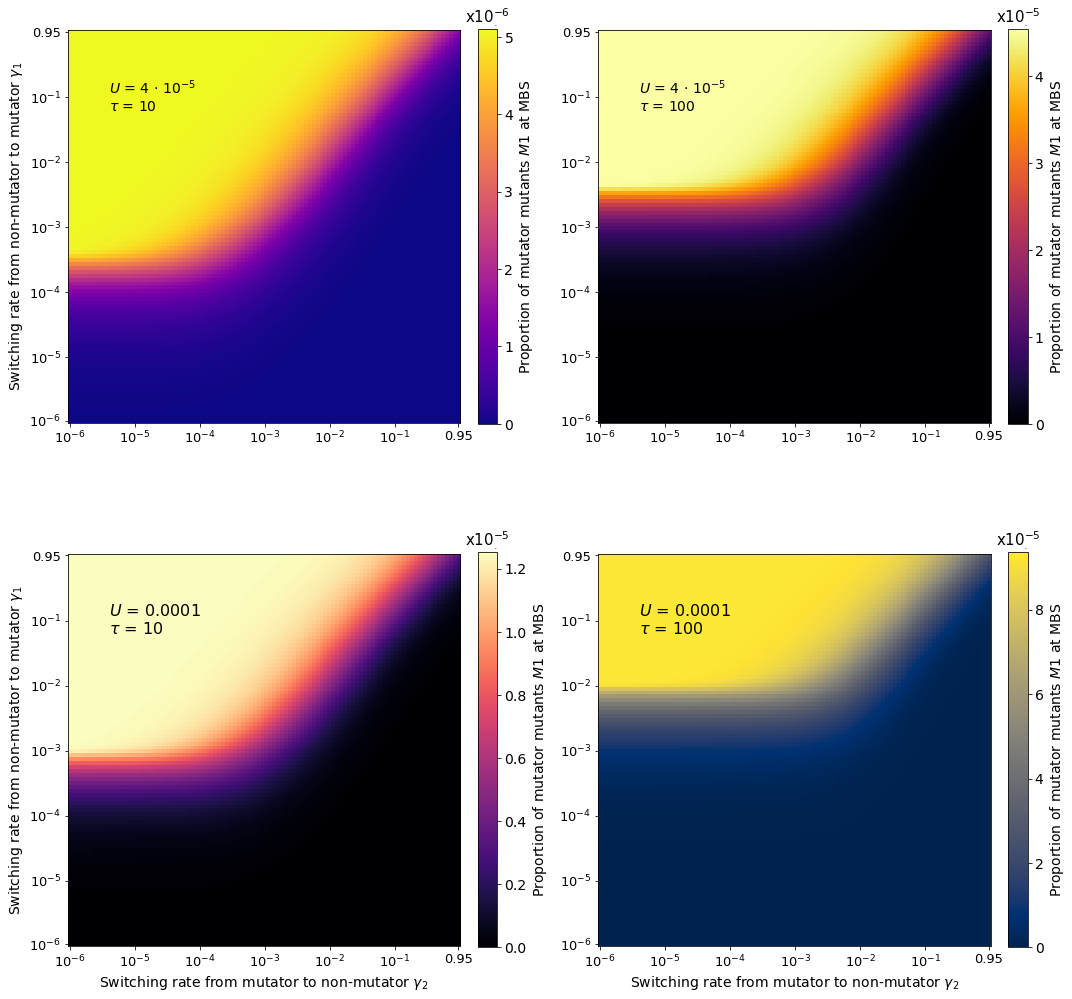

In [91]:
for paramset in [1]:

    fig, ax = plt.subplots(2,2, figsize = (15,15))
    
    upper_bound = np.max([np.max(all_results[params[set_paramsets_s[paramset][it]]]['M1']) for it in range(4)])

    im0 = ax[0,0].imshow(all_results[params[set_paramsets_s[paramset][0]]]['M1'], vmin = 0, cmap = 'plasma')
    im1 = ax[0,1].imshow(all_results[params[set_paramsets_s[paramset][1]]]['M1'], vmin = 0, cmap = 'inferno')
    im2 = ax[1,0].imshow(all_results[params[set_paramsets_s[paramset][2]]]['M1'], vmin = 0, cmap = 'magma')
    im3 = ax[1,1].imshow(all_results[params[set_paramsets_s[paramset][3]]]['M1'], vmin = 0, cmap = 'cividis')
    
    cbar0 = plt.colorbar(im0, ax=ax[0,0], fraction=0.046, pad=0.04)
    cbar1 = plt.colorbar(im1, ax=ax[0,1], fraction=0.046, pad=0.04)
    cbar2 = plt.colorbar(im2, ax=ax[1,0], fraction=0.046, pad=0.04)
    cbar3 = plt.colorbar(im3, ax=ax[1,1], fraction=0.046, pad=0.04)
    
    for cbar in [cbar0, cbar1, cbar2, cbar3]:
        cbar.ax.tick_params(labelsize=14)
        cbar.set_label('Proportion of mutator mutants $M1$ at MBS', fontsize = 14)
        cbar.ax.yaxis.offsetText.set(size=14)
        cbar.formatter.set_powerlimits((0, 0))
        cbar.ax.yaxis.offsetText.set(size=0)
        cbar.ax.set_title(exponents_notation[[cbar0, cbar1, cbar2, cbar3].index(cbar)], fontsize = 15)


    ax[0,0].text(10,20, '$U$ = 4 $\cdot$ $10^{-5}$ \n$\\tau$ = 10', fontsize = 14, c = 'black')
    ax[0,1].text(10,20, '$U$ = 4 $\cdot$ $10^{-5}$ \n$\\tau$ = 100', fontsize = 14, c = 'black')
    ax[1,0].text(10,20, '$U$ = 0.0001 \n$\\tau$ = 10', fontsize = 16, c = 'black')
    ax[1,1].text(10,20, '$U$ = 0.0001 \n$\\tau$ = 100', fontsize = 16, c = 'black')

    for i in range(2):
        ax[i,0].set_ylabel('Switching rate from non-mutator to mutator $\gamma_1$', fontsize = 14)
        ax[1,i].set_xlabel('Switching rate from mutator to non-mutator $\gamma_2$', fontsize = 14)
        for j in range(2):
            ax[i,j].set_xticks(which_ticks)
            ax[i,j].set_xticklabels(noise_labels, fontsize = 13)
            ax[i,j].set_yticks(which_ticks)
            ax[i,j].set_yticklabels(noise_labels[::-1], fontsize = 13)
            

    plt.tight_layout()
    output_folder = 'figures/frequencies_M1_0_1/'
    plt.savefig(output_folder+'frequencies_M1_'+str(paramset)+'_20JAN.jpg', dpi = 400)
    plt.show()    

In [92]:
exponents_notation = ['x$10^{-6}$', 'x$10^{-5}$', 'x$10^{-6}$', 'x$10^{-5}$']

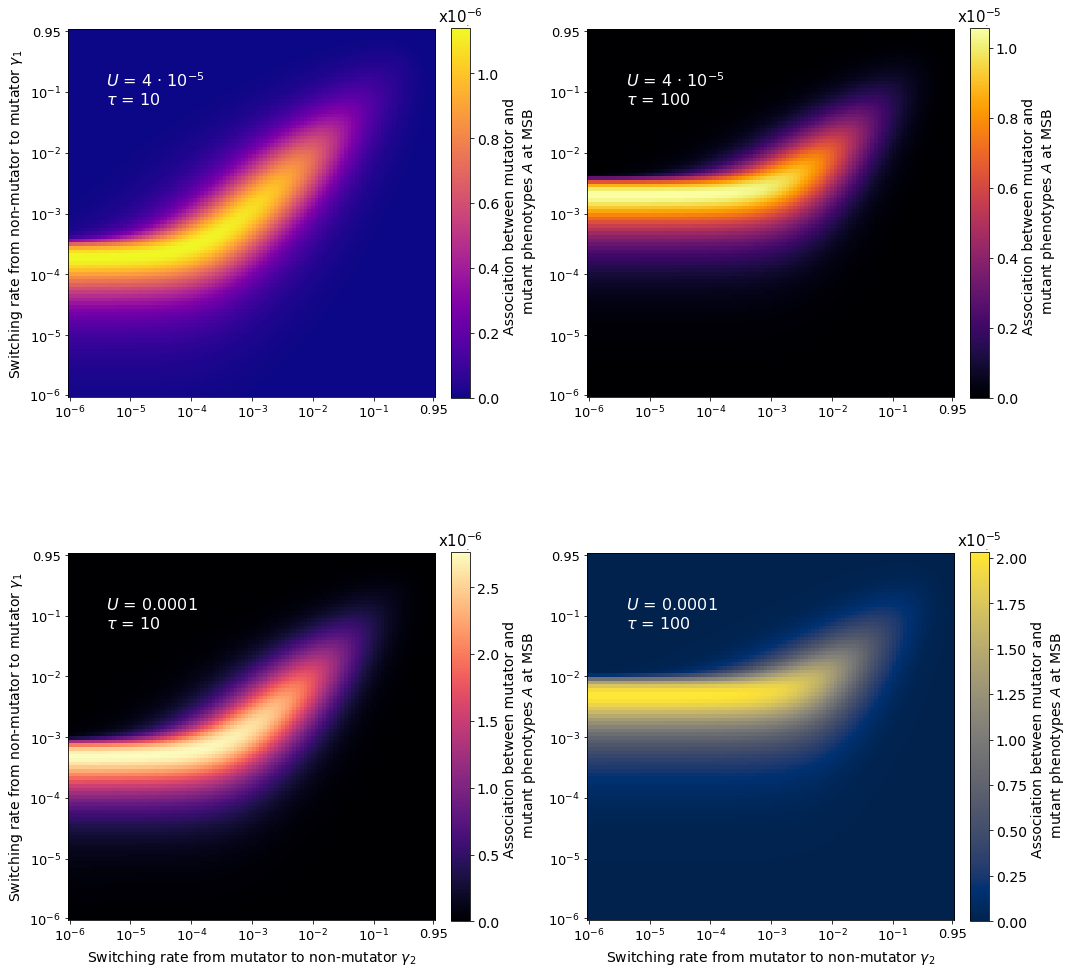

In [93]:
for paramset in [1]:

    fig, ax = plt.subplots(2,2, figsize = (15,15))
    
    upper_bound = np.max([np.max(all_results[params[set_paramsets_s[paramset][it]]]['association']) for it in range(4)])

    im0 = ax[0,0].imshow(all_results[params[set_paramsets_s[paramset][0]]]['association'], vmin = 0, cmap = 'plasma')
    im1 = ax[0,1].imshow(all_results[params[set_paramsets_s[paramset][1]]]['association'], vmin = 0, cmap = 'inferno')
    im2 = ax[1,0].imshow(all_results[params[set_paramsets_s[paramset][2]]]['association'], vmin = 0, cmap = 'magma')
    im3 = ax[1,1].imshow(all_results[params[set_paramsets_s[paramset][3]]]['association'], vmin = 0, cmap = 'cividis')
    
    cbar0 = plt.colorbar(im0, ax=ax[0,0], fraction=0.046, pad=0.04)
    cbar1 = plt.colorbar(im1, ax=ax[0,1], fraction=0.046, pad=0.04)
    cbar2 = plt.colorbar(im2, ax=ax[1,0], fraction=0.046, pad=0.04)
    cbar3 = plt.colorbar(im3, ax=ax[1,1], fraction=0.046, pad=0.04)
    
    for cbar in [cbar0, cbar1, cbar2, cbar3]:
        cbar.ax.tick_params(labelsize=14)
        cbar.set_label('Association between mutator and \n mutant phenotypes $A$ at MSB', fontsize = 14)
        cbar.ax.yaxis.offsetText.set(size=14)
        cbar.formatter.set_powerlimits((0, 0))
        cbar.ax.yaxis.offsetText.set(size=0)
        cbar.ax.set_title(exponents_notation[[cbar0, cbar1, cbar2, cbar3].index(cbar)], fontsize = 15)


    ax[0,0].text(10,20, '$U$ = 4 $\cdot$ $10^{-5}$ \n$\\tau$ = 10', fontsize = 16, c = 'white')
    ax[0,1].text(10,20, '$U$ = 4 $\cdot$ $10^{-5}$ \n$\\tau$ = 100', fontsize = 16, c = 'white')
    ax[1,0].text(10,20, '$U$ = 0.0001 \n$\\tau$ = 10', fontsize = 16, c = 'white')
    ax[1,1].text(10,20, '$U$ = 0.0001 \n$\\tau$ = 100', fontsize = 16, c = 'white')

    for i in range(2):
        ax[i,0].set_ylabel('Switching rate from non-mutator to mutator $\gamma_1$', fontsize = 14)
        ax[1,i].set_xlabel('Switching rate from mutator to non-mutator $\gamma_2$', fontsize = 14)
        for j in range(2):
            ax[i,j].set_xticks(which_ticks)
            ax[i,j].set_xticklabels(noise_labels, fontsize = 13)
            ax[i,j].set_yticks(which_ticks)
            ax[i,j].set_yticklabels(noise_labels[::-1], fontsize = 13)

    plt.tight_layout()
    output_folder = 'figures/association_mutant_mutator_0_1/'
    plt.savefig(output_folder+'association_'+str(paramset)+'_20JAN.jpg', dpi = 400)
    plt.show()    

In [62]:
switching_rates = np.logspace(-6, np.log10(0.95),100)
range_axis = np.arange(100)

<ipython-input-86-989d4f48bdb5>:10: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("plasma"))
  cmap.set_bad(color='lightgrey')
<ipython-input-86-989d4f48bdb5>:16: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("inferno"))
  cmap.set_bad(color='lightgrey')
<ipython-input-86-989d4f48bdb5>:22: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap =

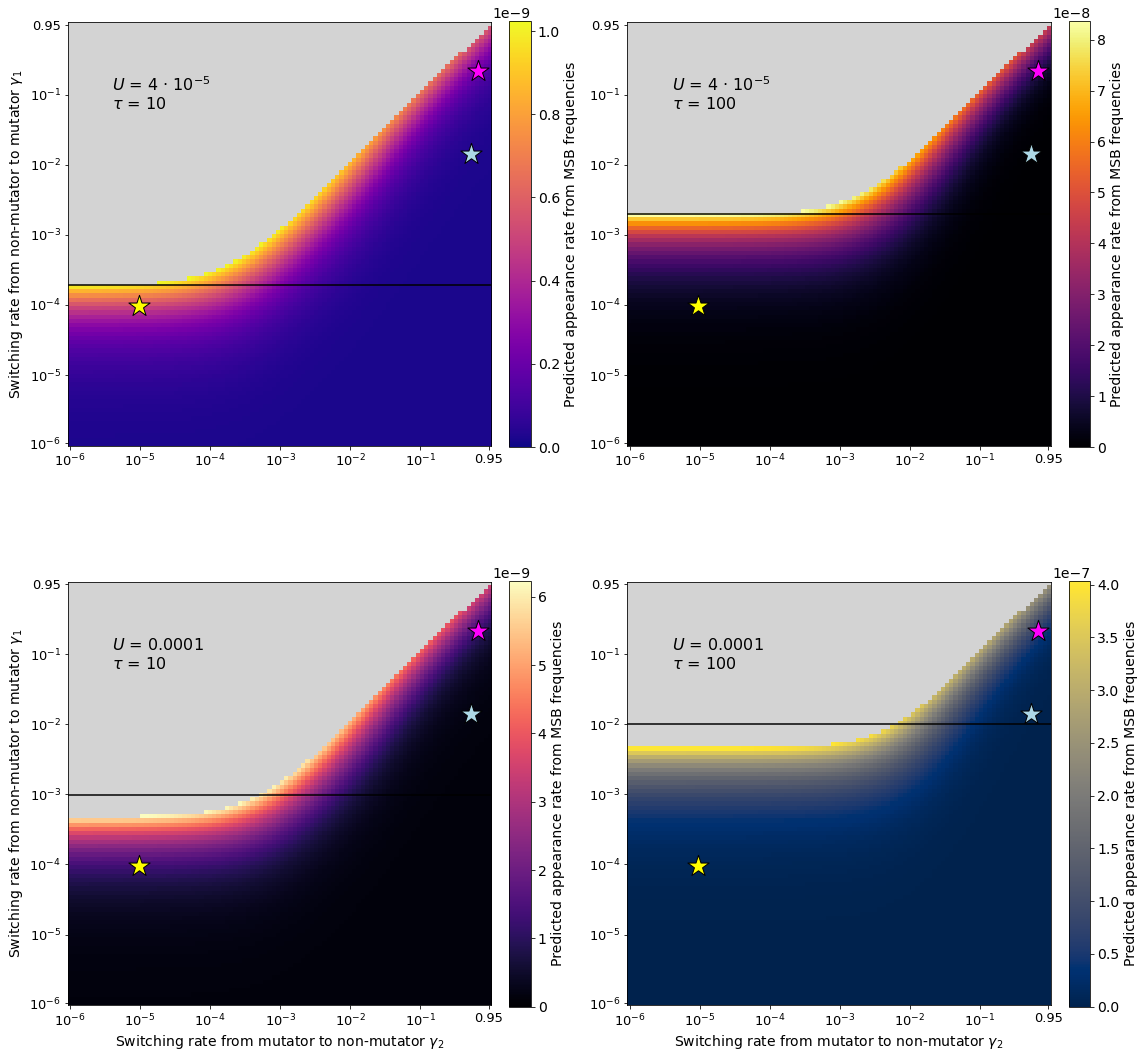

In [86]:
for paramset in [1]:

    fig, ax = plt.subplots(2,2, figsize = (16,16))
    
    upper_bound = np.max([np.max(all_results[params[set_paramsets_s[paramset][it]]]['adaptation']) for it in range(4)])
    
    masked_array_0 = np.ma.masked_where(all_results[params[set_paramsets_s[paramset][0]]]['pM'] > 0.5,
                                      all_results[params[set_paramsets_s[paramset][0]]]['adaptation'])
    cmap = matplotlib.cm.plasma
    cmap.set_bad(color='lightgrey')
    im0 = ax[0,0].imshow(masked_array_0, vmin = 0, cmap = 'plasma')
    
    masked_array_1 = np.ma.masked_where(all_results[params[set_paramsets_s[paramset][1]]]['pM'] > 0.5,
                                      all_results[params[set_paramsets_s[paramset][1]]]['adaptation'])
    cmap = matplotlib.cm.inferno
    cmap.set_bad(color='lightgrey')
    im1 = ax[0,1].imshow(masked_array_1, vmin = 0, cmap = 'inferno')    
    
    masked_array_2 = np.ma.masked_where(all_results[params[set_paramsets_s[paramset][2]]]['pM'] > 0.5,
                                      all_results[params[set_paramsets_s[paramset][2]]]['adaptation'])
    cmap = matplotlib.cm.magma
    cmap.set_bad(color='lightgrey')
    im2 = ax[1,0].imshow(masked_array_2, vmin = 0, cmap = 'magma')  

    masked_array_3 = np.ma.masked_where(all_results[params[set_paramsets_s[paramset][3]]]['pM'] > 0.5,
                                      all_results[params[set_paramsets_s[paramset][3]]]['adaptation'])
    cmap = matplotlib.cm.cividis
    cmap.set_bad(color='lightgrey')
    im3 = ax[1,1].imshow(masked_array_3, vmin = 0, cmap = 'cividis')  
    
    cbar0 = plt.colorbar(im0, ax=ax[0,0], fraction=0.046, pad=0.04)
    cbar1 = plt.colorbar(im1, ax=ax[0,1], fraction=0.046, pad=0.04)
    cbar2 = plt.colorbar(im2, ax=ax[1,0], fraction=0.046, pad=0.04)
    cbar3 = plt.colorbar(im3, ax=ax[1,1], fraction=0.046, pad=0.04)
    
    ax[0,0].axhline(100-convert_logspace(2e-4, switching_rates, range_axis), c = 'k')
    ax[0,1].axhline(100-convert_logspace(2e-3, switching_rates, range_axis), c = 'k')
    #ax[1,0].axhline(100-convert_logspace(1e-3*0.5, switching_rates, range_axis), c = 'k')
    #ax[1,1].axhline(100-convert_logspace(1e-2*0.5, switching_rates, range_axis), c = 'k')
    
    ax[1,0].axhline(100-convert_logspace(1e-3, switching_rates, range_axis), c = 'k')
    ax[1,1].axhline(100-convert_logspace(1e-2, switching_rates, range_axis), c = 'k')
    
    for cbar in [cbar0, cbar1, cbar2, cbar3]:
        cbar.ax.tick_params(labelsize=14)
        cbar.set_label('Predicted appearance rate from MSB frequencies', fontsize = 14)
        cbar.ax.yaxis.offsetText.set(size=14)
        cbar.formatter.set_powerlimits((0, 0))


    ax[0,0].text(10,20, '$U$ = 4 $\cdot$ $10^{-5}$ \n$\\tau$ = 10', fontsize = 16, c = 'black')
    ax[0,1].text(10,20, '$U$ = 4 $\cdot$ $10^{-5}$ \n$\\tau$ = 100', fontsize = 16, c = 'black')
    ax[1,0].text(10,20, '$U$ = 0.0001 \n$\\tau$ = 10', fontsize = 16, c = 'black')
    ax[1,1].text(10,20, '$U$ = 0.0001 \n$\\tau$ = 100', fontsize = 16, c = 'black')

    for i in range(2):
        ax[i,0].set_ylabel('Switching rate from non-mutator to mutator $\gamma_1$', fontsize = 14)
        ax[1,i].set_xlabel('Switching rate from mutator to non-mutator $\gamma_2$', fontsize = 14)
        for j in range(2):
            ax[i,j].set_xticks(which_ticks)
            ax[i,j].set_xticklabels(noise_labels, fontsize = 13)
            ax[i,j].set_yticks(which_ticks)
            ax[i,j].set_yticklabels(noise_labels[::-1], fontsize = 13)
            ax[i,j].scatter(convert_logspace(1e-5, switching_rates, range_axis)-0.5,
                            100-convert_logspace(1e-4, switching_rates, range_axis), marker = '*', c = 'yellow', s= 500, edgecolor = 'k')
            ax[i,j].scatter(convert_logspace(0.5, switching_rates, range_axis)-0.5,
                            100-convert_logspace(0.014, switching_rates, range_axis), marker = '*', c = 'lightblue', s= 500, edgecolor = 'k')
            ax[i,j].scatter(convert_logspace(0.63, switching_rates, range_axis)-0.5,
                            100-convert_logspace(0.21, switching_rates, range_axis), marker = '*', c = 'magenta', s= 500, edgecolor = 'k')

    plt.tight_layout()
    output_folder = 'figures/adaptation_mutant_mutator_0_1/'
    plt.savefig(output_folder+'adaptation_'+str(paramset)+'.jpg', dpi = 400)
    plt.show()    

### plotting figure 2 single panel

In [64]:
set_paramsets_s[1]

(2, 3, 8, 9)

In [79]:
exponents_notation = ['x$10^{-9}$', 'x$10^{-8}$', 'x$10^{-9}$', 'x$10^{-7}$']

<ipython-input-84-1e8819d96a07>:10: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("plasma"))
  cmap.set_bad(color='lightgrey')
<ipython-input-84-1e8819d96a07>:16: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("inferno"))
  cmap.set_bad(color='lightgrey')
<ipython-input-84-1e8819d96a07>:22: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap =

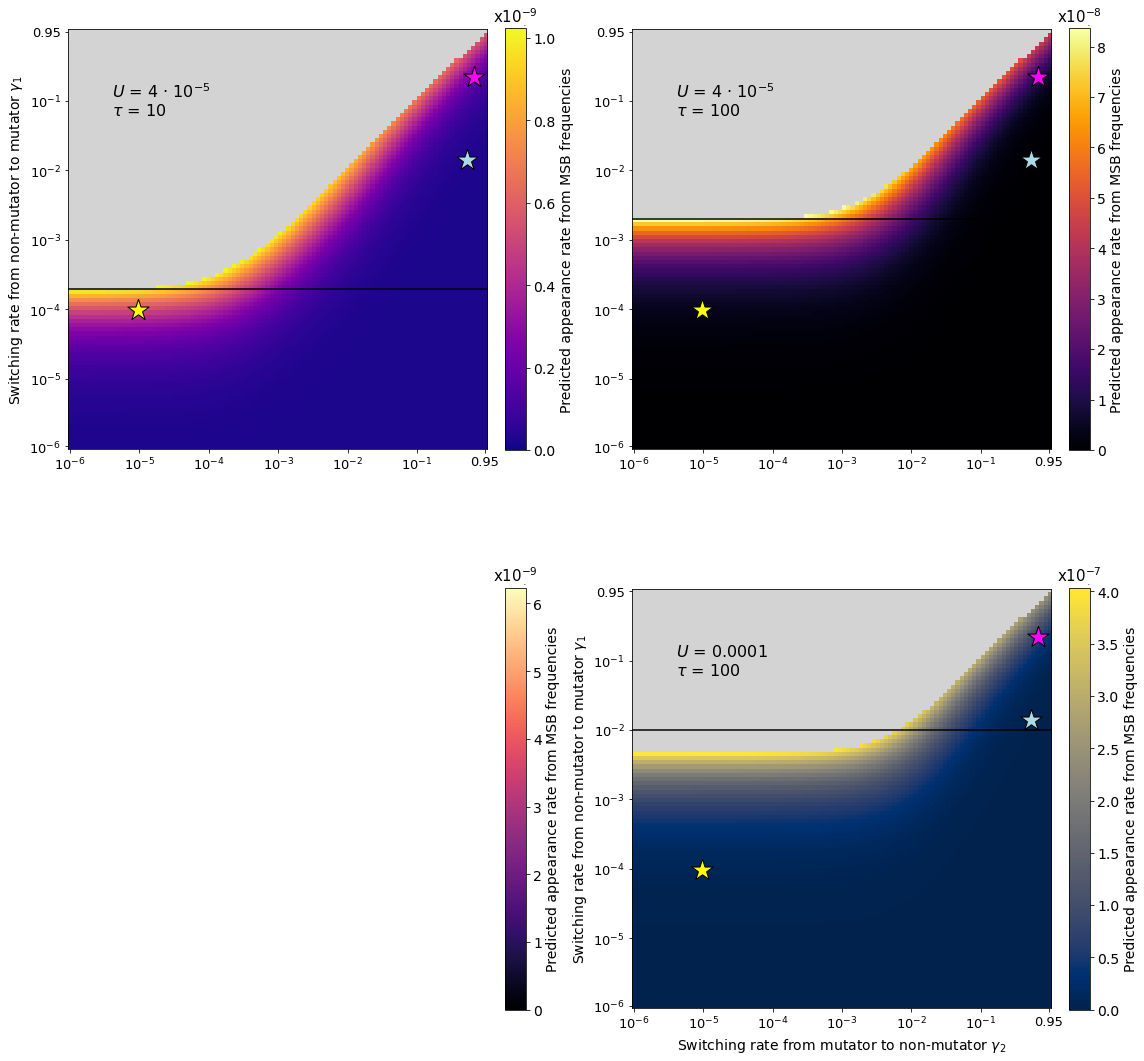

In [84]:
fig, ax = plt.subplots(2,2, figsize = (16,16))

paramset = 1

upper_bound = np.max([np.max(all_results[params[set_paramsets_s[paramset][it]]]['adaptation']) for it in range(4)])

masked_array_0 = np.ma.masked_where(all_results[params[set_paramsets_s[paramset][0]]]['pM'] > 0.5,
                                  all_results[params[set_paramsets_s[paramset][0]]]['adaptation'])
cmap = matplotlib.cm.plasma
cmap.set_bad(color='lightgrey')
im0 = ax[0,0].imshow(masked_array_0, vmin = 0, cmap = 'plasma')

masked_array_paramset = np.ma.masked_where(all_results[params[set_paramsets_s[paramset][paramset]]]['pM'] > 0.5,
                                  all_results[params[set_paramsets_s[paramset][paramset]]]['adaptation'])
cmap = matplotlib.cm.inferno
cmap.set_bad(color='lightgrey')
im1 = ax[0,1].imshow(masked_array_paramset, vmin = 0, cmap = 'inferno')    

masked_array_2 = np.ma.masked_where(all_results[params[set_paramsets_s[paramset][2]]]['pM'] > 0.5,
                                  all_results[params[set_paramsets_s[paramset][2]]]['adaptation'])
cmap = matplotlib.cm.magma
cmap.set_bad(color='lightgrey')
im2 = ax[1,0].imshow(masked_array_2, vmin = 0, cmap = 'magma')  

masked_array_3 = np.ma.masked_where(all_results[params[set_paramsets_s[paramset][3]]]['pM'] > 0.5,
                                  all_results[params[set_paramsets_s[paramset][3]]]['adaptation'])
cmap = matplotlib.cm.cividis
cmap.set_bad(color='lightgrey')
im3 = ax[1,1].imshow(masked_array_3, vmin = 0, cmap = 'cividis')  

cbar0 = plt.colorbar(im0, ax=ax[0,0], fraction=0.046, pad=0.04)
cbar1 = plt.colorbar(im1, ax=ax[0,1], fraction=0.046, pad=0.04)
cbar2 = plt.colorbar(im2, ax=ax[1,0], fraction=0.046, pad=0.04)
cbar3 = plt.colorbar(im3, ax=ax[1,1], fraction=0.046, pad=0.04)

ax[0,0].axhline(100-convert_logspace(2e-4, switching_rates, range_axis), c = 'k')
ax[0,1].axhline(100-convert_logspace(2e-3, switching_rates, range_axis), c = 'k')
#ax[paramset,0].axhline(paramset00-convert_logspace(paramsete-3*0.5, switching_rates, range_axis), c = 'k')
#ax[paramset,paramset].axhline(paramset00-convert_logspace(paramsete-2*0.5, switching_rates, range_axis), c = 'k')

ax[1,0].axhline(100-convert_logspace(1e-3, switching_rates, range_axis), c = 'k')
ax[1,1].axhline(100-convert_logspace(1e-2, switching_rates, range_axis), c = 'k')

for cbar in [cbar0, cbar1, cbar2, cbar3]:
    cbar.ax.tick_params(labelsize=14)
    cbar.set_label('Predicted appearance rate from MSB frequencies', fontsize = 14)
    cbar.ax.yaxis.offsetText.set(size=14)
    cbar.formatter.set_powerlimits((0, 0))
    cbar.ax.yaxis.offsetText.set(size=0)
    cbar.ax.set_title(exponents_notation[[cbar0, cbar1, cbar2, cbar3].index(cbar)], fontsize = 15)
    
ax[1,1].set_ylabel('Switching rate from non-mutator to mutator $\gamma_1$', fontsize = 14)

ax[0,0].text(10,20, '$U$ = 4 $\cdot$ $10^{-5}$ \n$\\tau$ = 10', fontsize = 16, c = 'black')
ax[0,1].text(10,20, '$U$ = 4 $\cdot$ $10^{-5}$ \n$\\tau$ = 100', fontsize = 16, c = 'black')
ax[1,0].text(10,20, '$U$ = 0.0001 \n$\\tau$ = 10', fontsize = 16, c = 'black')
ax[1,1].text(10,20, '$U$ = 0.0001 \n$\\tau$ = 100', fontsize = 16, c = 'black')

for i in range(2):
    ax[i,0].set_ylabel('Switching rate from non-mutator to mutator $\gamma_1$', fontsize = 14)
    ax[1,i].set_xlabel('Switching rate from mutator to non-mutator $\gamma_2$', fontsize = 14)
    for j in range(2):
        ax[i,j].set_xticks(which_ticks)
        ax[i,j].set_xticklabels(noise_labels, fontsize = 13)
        ax[i,j].set_yticks(which_ticks)
        ax[i,j].set_yticklabels(noise_labels[::-1], fontsize = 13)
        ax[i,j].scatter(convert_logspace(1e-5, switching_rates, range_axis)-0.5,
                        100-convert_logspace(1e-4, switching_rates, range_axis), marker = '*', c = 'yellow', s= 500, edgecolor = 'k')
        ax[i,j].scatter(convert_logspace(0.5, switching_rates, range_axis)-0.5,
                            100-convert_logspace(0.014, switching_rates, range_axis), marker = '*', c = 'lightblue', s= 500, edgecolor = 'k')
        ax[i,j].scatter(convert_logspace(0.63, switching_rates, range_axis)-0.5,
                            100-convert_logspace(0.21, switching_rates, range_axis), marker = '*', c = 'magenta', s= 500, edgecolor = 'k')
            

ax[1,0].set_visible(False)   
                        
plt.tight_layout()

output_folder = 'figures/adaptation_mutant_mutator_0_1/'
plt.savefig(output_folder+'adaptation_'+str(paramset)+'_JAN20.jpg', dpi = 400)
plt.show()    

<ipython-input-68-7b97e55dedd0>:6: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("cividis"))
  cmap.set_bad(color='lightgrey')


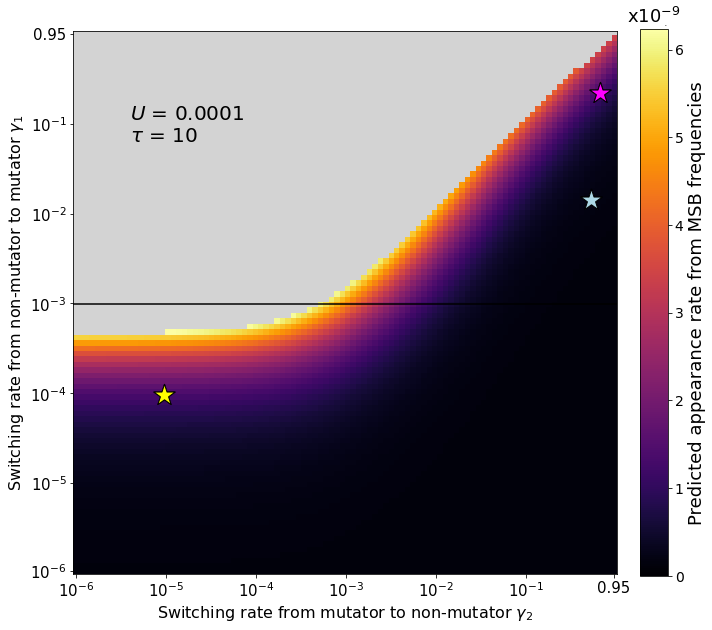

In [68]:
fig, ax = plt.subplots(1,1, figsize = (10,10))

masked_array_2 = np.ma.masked_where(all_results[params[set_paramsets_s[1][2]]]['pM'] > 0.5,
                                  all_results[params[set_paramsets_s[1][2]]]['adaptation'])
cmap = matplotlib.cm.cividis
cmap.set_bad(color='lightgrey')
im3 = ax.imshow(masked_array_2, vmin = 0, cmap = 'inferno')  
cbar2 = plt.colorbar(im3, ax=ax, fraction=0.046, pad=0.04)

ax.axhline(100-convert_logspace(1e-3, switching_rates, range_axis), c = 'k')

cbar2.ax.tick_params(labelsize=14)
cbar2.set_label('Predicted appearance rate from MSB frequencies', fontsize = 18)
cbar2.ax.yaxis.offsetText.set(size=0)
cbar2.ax.set_title('x$10^{-9}$', fontsize = 18)
ax.text(10,20, '$U$ = 0.0001 \n$\\tau$ = 10', fontsize = 20, c = 'black')

ax.set_ylabel('Switching rate from non-mutator to mutator $\gamma_1$', fontsize = 16)
ax.set_xlabel('Switching rate from mutator to non-mutator $\gamma_2$', fontsize = 16)

for j in range(2):
    ax.set_xticks(which_ticks)
    ax.set_xticklabels(noise_labels, fontsize = 15)
    ax.set_yticks(which_ticks)
    ax.set_yticklabels(noise_labels[::-1], fontsize = 15)
    ax.scatter(convert_logspace(1e-5, switching_rates, range_axis)-0.5,
                    100-convert_logspace(1e-4, switching_rates, range_axis), marker = '*', c = 'yellow', s= 500, edgecolor = 'k')
    ax.scatter(convert_logspace(0.5, switching_rates, range_axis)-0.5,
                            100-convert_logspace(0.014, switching_rates, range_axis), marker = '*', c = 'lightblue', s= 500, edgecolor = 'k')
    ax.scatter(convert_logspace(0.63, switching_rates, range_axis)-0.5,
                            100-convert_logspace(0.21, switching_rates, range_axis), marker = '*', c = 'magenta', s= 500, edgecolor = 'k')

plt.tight_layout()
plt.savefig('figures/one_panel_figure2_JAN20.jpg', dpi = 500, bbox_inches = 'tight')

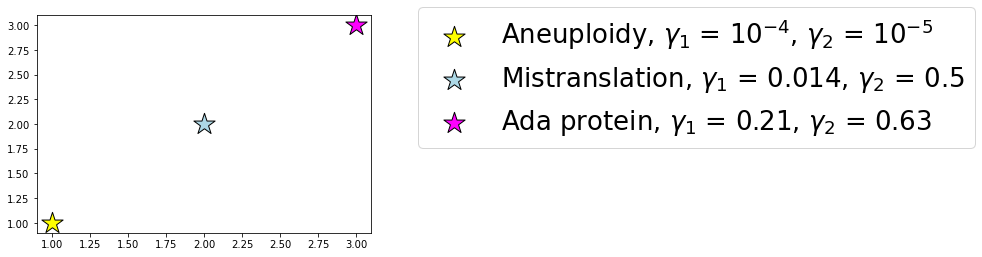

In [76]:
plt.scatter([1],[1], marker = '*', c = 'yellow', s= 500, edgecolors='k')
plt.scatter([2],[2], marker = '*', c = 'lightblue', s= 500, edgecolors='k')
plt.scatter([3],[3], marker = '*', c = 'magenta', s= 500, edgecolors='k')

plt.legend(['Aneuploidy, $\gamma_1$ = $10^{-4}$, $\gamma_2$ = $10^{-5}$',
            'Mistranslation, $\gamma_1$ = 0.014, $\gamma_2$ = 0.5',
            'Ada protein, $\gamma_1$ = 0.21, $\gamma_2$ = 0.63'], fontsize = 26, bbox_to_anchor = (1.1,1.1))

plt.savefig('figures/adaptation_mutant_mutator_0_1/legend_adaptation.jpg', bbox_inches = 'tight', dpi = 400)